In [20]:
import itertools
import numpy as np
from numpy import pi
from qiskit import Aer
from qiskit.compiler import transpile
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks

Una medida generaliza es un conjunto de operadores $M_j$ que satisfacen $\sum_j M_j^\dagger M_j = I$. A los operadores $E_j=M_j^\dagger M_j $ son llamados elementos de POVM.

In [12]:
def random_quantum_state():
    z0 = np.random.randn(2) + 1j * np.random.randn(2)
    z0 = z0 / np.linalg.norm(z0)
    return z0

# Create random states
# ψ = random_quantum_state()
# ϕ = random_quantum_state()
ψ = np.array([1,0])
φ = np.array([0,1])

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0],  [0]

params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))
# Initialize Discriminator
discriminator = StateDiscriminativeQuantumNeuralNetworks(ψ, ϕ)

# Calculate cost function
discriminator.cost_function(params)

0.5

In [16]:
circuit = discriminator.get_n_element_povm(2,th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2)

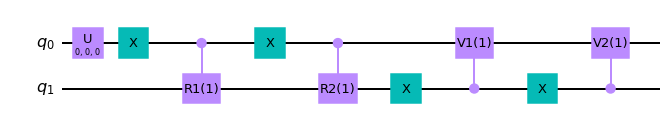

In [17]:
circuit.draw(output='mpl')

In [21]:
backend_sim = Aer.get_backend(discriminator.backend)

In [22]:
circuit = transpile( circuit, backend_sim) 

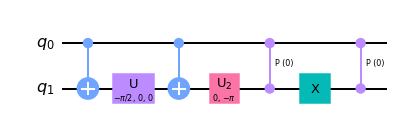

In [23]:
circuit.draw(output='mpl')

In [5]:
def discriminate( optimizer, initial_params ):
    
    fun = discriminator.cost_function
    
    results = optimizer.optimize( len(initial_params), fun, initial_point = np.random.randn(11) )
    
    return results


In [6]:
from qiskit.algorithms.optimizers import COBYLA, SPSA, ADAM

In [7]:
optimizer = COBYLA(500)

In [8]:
results = discriminate( optimizer, params )

In [9]:
results

(array([ 0.17214801,  0.61471859, -0.81714183,  0.72308605, -0.43033982,
        -1.57301301, -0.74917735, -0.94621217,  1.22267458,  0.09732909,
        -1.24511778]),
 0.51025390625,
 96)

In [10]:
abs(np.vdot(ψ,ϕ))**2

0

In [11]:
0.5  - 0.5*np.sqrt(1- abs(np.vdot(ψ,ϕ))**2 ) 

0.0